<div style="display: flex; align-items: center; padding: 20px;">
    <div style="flex-grow: 1;">
        <h2><strong>MOSHFEGHI Maxime</strong></h2>
    </div>
    <div style="flex-shrink: 0; width: 20%;">
        <img src="https://hal.insa-toulouse.fr/public/Logo_INSAToulouse_blanc.png" alt="Logo INSA Toulouse" style="width: 90%; height: auto;">
    </div>
</div>

# __<div align="center">EDP : TP3 - Monotonies et limiteurs</div>__

In [114]:
import matplotlib.pyplot as plt
import numpy as np

## **0. Implémentation**

### **0.1. Implémentations des limiteurs**

In [115]:
def sans_lim(r):
    return 1

def lim_minmod(r):
    if r >= 0 :
        eval_min = min(r,1)
    else :
        eval_min = 0
    return eval_min

def lim_superbee(r):
    return max(0, min(2*r, 1), min(r,2))

def lim_vanleer(r):
    # On traite le cas où 1 + r = 0
    if r == - 1 :
        ret = (r + abs(r))/(1 + r + 1e-9)
    else :
        ret = (r + abs(r))/(1 + r)
    return ret

def lim_vanalbada(r):
    return (r**2 + r)/(r**2 + 1)

### **0.2. Implémentations des schémas limités**

#### __0.2.1. BW limité__

In [116]:
def BW_u_i_nplus1(u_iplus1_n, u_i_n, u_imoins1_n, u_imoins2_n, C, limiteur):
    if ((u_i_n - u_imoins1_n) == 0) :
        den_ri = 1e-9
    else :
        den_ri = u_i_n - u_imoins1_n
    if ((u_imoins1_n - u_imoins2_n) == 0) :
        den_rimoins1 = 1e-9
    else :
        den_rimoins1 = u_imoins1_n - u_imoins2_n
    r_i = (u_iplus1_n - u_i_n)/den_ri
    r_imoins1 = (u_i_n - u_imoins1_n)/den_rimoins1
    return u_i_n - C * (u_i_n - u_imoins1_n) - (C/2) * (1 - C) * limiteur(r_i) * (u_i_n - u_imoins1_n) + (C/2) * (1 - C) * limiteur(r_imoins1) * (u_imoins1_n - u_imoins2_n)

#### __0.2.2. LW limité__

In [117]:
def LW_u_i_nplus1(u_iplus1_n, u_i_n, u_imoins1_n, u_imoins2_n, C, limiteur): # TODO : à finir
    if ((u_iplus1_n - u_i_n) == 0) :
        den_Ri = 1e-9
    else :
        den_Ri = u_iplus1_n - u_i_n
    if ((u_i_n - u_imoins1_n) == 0) :
        den_Rimoins1 = 1e-9
    else :
        den_Rimoins1 = u_i_n - u_imoins1_n
    R_i = (u_i_n - u_imoins1_n)/den_Ri
    R_imoins1 = (u_imoins1_n - u_imoins2_n)/den_Rimoins1
    return u_i_n - C * (u_i_n - u_imoins1_n) - (C/2) * (1 - C) * limiteur(R_i) * (u_iplus1_n - u_i_n) + (C/2) * (1 - C) * limiteur(R_imoins1) * (u_i_n - u_imoins1_n)

**`Note sur le code :`** pour chaque coefficient $r_i$, on doit faire une vérification que le dénominateur ne soit pas nul.

### **0.3. Implémentations autres**

In [118]:
# Constantes
C = 0.5

L = 1       # L = 1m
m = 50      # m = 50
x0 = 0.5    # x0 = 0.5m

a = 1       # a = 1m/s

T = 1
deltax = L/m
deltaT = C*deltax/a
p = int(T/deltaT)

abscisse = np.linspace(0,L,m)
abscisse_temps = np.linspace(0,T,p)


def CI(x,x0):
    return x > x0

u0 = np.vectorize(CI)(abscisse,x0)


# Fonction TV évaluée pour plusieurs u_n (renvoie un vecteur contenant plusieurs scalaires)
def TV(une_grille):
    grille_diff = une_grille[1:,:] - une_grille[:-1,:]
    ret_TV = np.zeros(p+1)
    ret_TV[0:-1] = np.sum(np.abs(grille_diff),0)
    return ret_TV

def grille(m, p, u0, schema, C, limiteur) :
    grille_retour = np.zeros((m,p))
    grille_retour[:,0] = u0
    for n in range(1,p) :
        for i in range(m) :
            grille_retour[i,n] = schema(grille_retour[(i + 1)%m,n - 1], grille_retour[i,n - 1], grille_retour[i - 1,n - 1], grille_retour[i - 2,n - 1], C, limiteur)
    return grille_retour


liste_limiteurs = [sans_lim, lim_minmod, lim_superbee, lim_vanleer, lim_vanalbada]
liste_noms_limiteurs = ["sans limiteur", "avec limiteur Min-mod", "avec limiteur Superbee", "avec limiteur Van-Leer", "avec limiteur Van-Albada"]
liste_schemas = [BW_u_i_nplus1, LW_u_i_nplus1]
liste_noms_schemas = ["BW", "LW"]

## **1. Traçage sans et avec limiteurs**

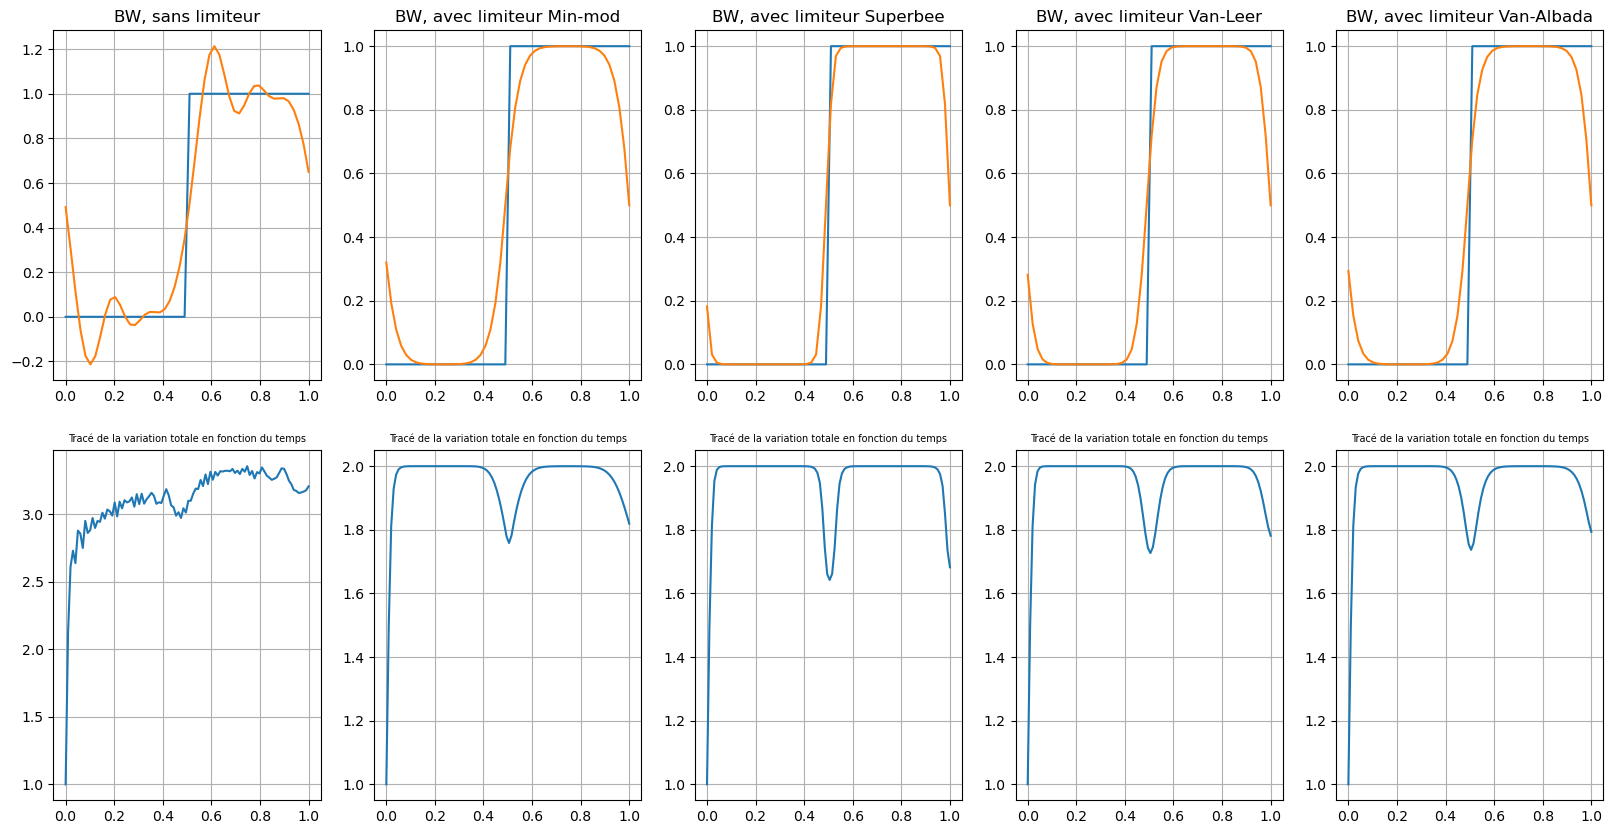

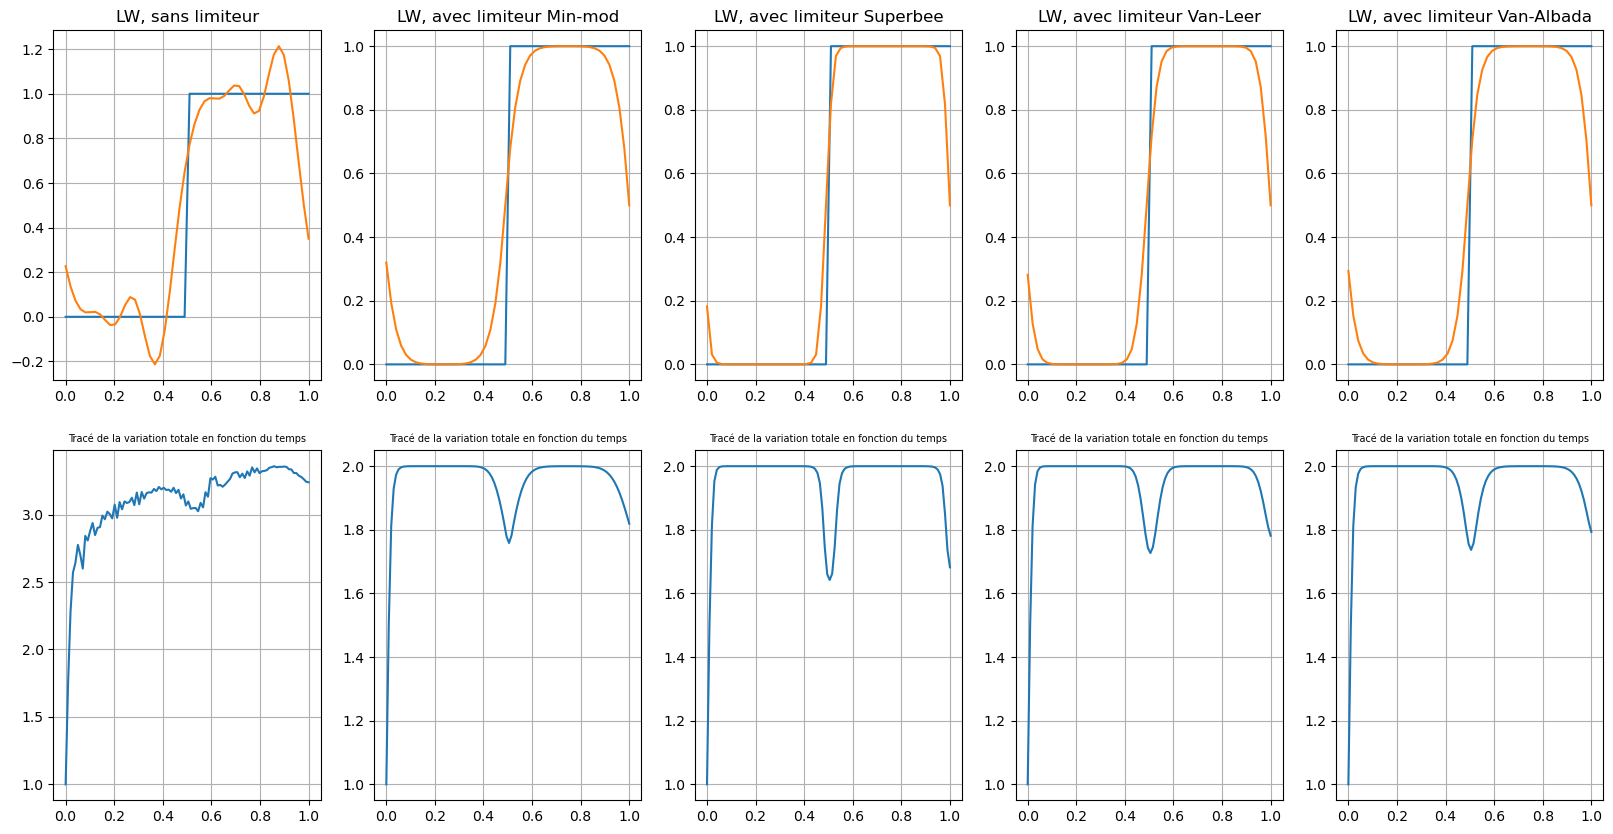

In [119]:
ind_schema = 0
for schema in liste_schemas :
    plt.figure(figsize=(20, 10))
    ind_lim = 0
    for limiteur in liste_limiteurs :
        plt.subplot(2,len(liste_limiteurs), ind_lim + 1)
        grille_temp = grille(m, p, u0, schema, C, limiteur)
        plt.plot(abscisse, grille_temp[:,0])
        plt.plot(abscisse, grille_temp[:,-1])
        plt.title(liste_noms_schemas[ind_schema] + ", " + liste_noms_limiteurs[ind_lim])
        plt.grid()
        liste_TV = TV(grille_temp)
        plt.subplot(2,len(liste_limiteurs), ind_lim + 1 + len(liste_limiteurs))
        plt.plot(abscisse_temps,liste_TV[0:-1])
        plt.title("Tracé de la variation totale en fonction du temps", size=7)
        plt.grid()
        ind_lim += 1
    ind_schema += 1

#### **Commentaires**

À chaque tracé de $TV$, la valeur initiale est de 1 (correspond à la marche du créneau).

On remarque que sans limiteur, $TV$ va croître jusqu'à une valeur supérieur à $3$, que ce soit dans le cas du schéma de Beam-Warming ou Lax-Wendroff. Cette valeur reste inférieure à $2$ dans le cas où l'on applique un limiteur. On peut l'interpréter graphiquement : dans le cas de l'usage d'un schéma sans limiteur, on constate que les variations de courbes restent "dans le créneau", dans le sens où on ne perçoit pas de dépassement où que ce soit dans l'espace. Par exemple, en regardant le graphe de $BW$ avec limiteur Min-mod, on voit que la différence de variations provient de la décroissance et croissance au temps au niveau des bords spatiaux (en 0 et en 1) au temps final.

Sans-limiteur, en plus des effets sur les bords spatiaux, on remarque que la courbe à tendance à osciller. C'est de là que vient la supériorité de $TV$ par rapport à quand l'on met un limiteur.

Au passage, on remarque qu'à $\text{CFL}$ fixé et avec un limiteur, les schémas de Beam-Warming et Lax-Wendroff deviennent les mêmes. 